<img src="../images/BDG_LOGO.png" alt="drawing" align="right" width="200"/>

# H2020 RIA BigDataGrapes - Predictive Data Analytics (T4.3)

### More details in the deliverable D4.3 (Pilot 1). 

#### The goal of this solution is to allow the user to explore and visualize the correlations in the sensor and phenological farming data collected in all test sites located in Greece to understand and explain what affects grape quality and yield. Data intelligence is used to answer questions on how some attributes, such as soil properties, affect grape quality and yield. Data integration has been achieved by using semantic web and ontologies in order to have all data connected in a knowledge graph.


### Import Libraries

In [1]:
import pandas as pd
import datetime
import numpy as np

from dateutil import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Correlation Auxiliar Functios

In [2]:

def plot_heat_map(correlation_matrix, column_labels, row_labels, title, plot_shape, idx_plot, rotation=0):        
    plt.figure(figsize=(6,4))
    plt.subplot(plot_shape[0], plot_shape[1],idx_plot)
    ax = sns.heatmap(correlation_matrix, linewidth=0.5, center=0, cmap="RdBu")
    ax.set_title(title)
    ax.set_yticklabels(row_labels, rotation=0, fontsize="12", va="center")
    ax.set_xticklabels(column_labels, rotation=rotation, fontsize="12", va="center")

def fn_correlation_matrix(df_row, df_column, lst_properties_rows, lst_properties_columns, verbose=False):
    
    # build the correlation matrix
    correlation_matrix = np.ones((len(lst_properties_rows), len(lst_properties_columns)), dtype=np.float64)
    
    for i, prop_row in enumerate(lst_properties_rows):
        for j, prop_column in enumerate(lst_properties_columns):
            x_1 = np.array(df_row[prop_row].tolist())
            y_2 = np.array(df_column[prop_column].tolist())

            # np.corrcoef: returns pearson product-moment correlation coefficients.
            current_correlation = np.corrcoef(x_1, y_2)[0,1]
            correlation_matrix[i][j] = current_correlation
    
    return correlation_matrix # , x_labels, y_labels


## 1. Correlation Analysis: Sensor data and Lab data

Handles associations and correlations between precision agriculture information (sensor data) and phenological data and grape chemical analysis (lab data). For the sensor data, we have specifically investigated the following properties: Elevation and Soil Electrical Conductivity (CV1m). For the lab data layer, we took the Sugar content (Brix%), # of Grape Crates per cells, Titratable acidity (%), Mass of Harvest Product (kg) for the correlation analysis.

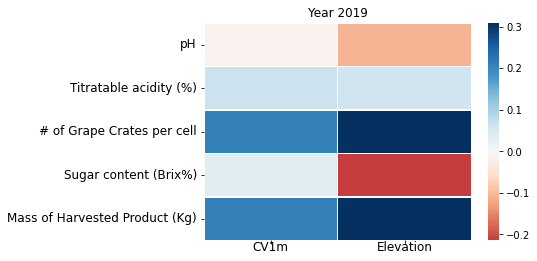

In [3]:
# load the dataset
path_to_load = "../datasets/preprocessed_for_api/correlation_sensorvslab/"
df_sensor = pd.read_csv(path_to_load + "df_sensor.csv", index_col=0)
df_lab = pd.read_csv(path_to_load + "df_lab.csv", index_col=0)

# features to correlate
lst_sensor_properties = ['CV1m', 'Elevation']
lst_lab_properties = ['pH', 'Titratable acidity (%)', '# of Grape Crates per cell', 'Sugar content (Brix%)', 'Mass of Harvested Product (Kg)']

# adjust the vector size according to the availability of the data for the cells 
cells_in_sensor_df = [c.replace("_", "") for c in df_sensor['cell'].unique()]
df_lab = df_lab[df_lab['cell'].isin(cells_in_sensor_df)]

# order by cell
df_lab.sort_values(by="cell", inplace=True, )
df_sensor.sort_values(by="cell", inplace=True)

# plot using data from 2019 only for the correlation analysis
correlation_matrix = fn_correlation_matrix(df_lab, df_sensor, lst_lab_properties, lst_sensor_properties)
plot_heat_map(correlation_matrix, lst_sensor_properties, lst_lab_properties, "Year 2019", (1,1),1)


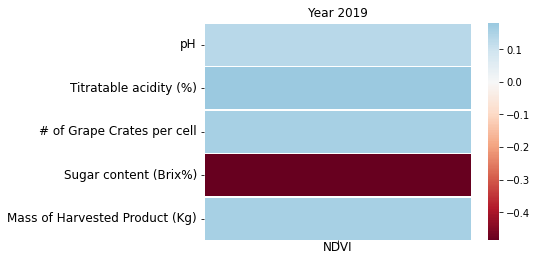

In [4]:
path_to_load = "../datasets/preprocessed_for_api/correlation_sensorvslab/"
df_crop = pd.read_csv(path_to_load + "df_crop.csv", index_col=0)
df_lab = pd.read_csv(path_to_load + "df_lab.csv", index_col=0)


lst_crop_NDVI_properties = ['NDVI']
lst_lab_properties = ['pH', 'Titratable acidity (%)', '# of Grape Crates per cell', 'Sugar content (Brix%)', 'Mass of Harvested Product (Kg)']

# order by cell
df_lab = df_lab.sort_values(by="cell")
df_crop = df_crop.sort_values(by="cell")

# plot using data from 2019 only for the correlation analysis
correlation_matrix = fn_correlation_matrix(df_lab, df_crop, lst_lab_properties, lst_crop_NDVI_properties)
plot_heat_map(correlation_matrix, lst_crop_NDVI_properties, lst_lab_properties, "Year 2019", (1,1),1)


### 2. Correlation Analysis: Sensor vs Satellite

Correlates the sensor data with earth observation data on vegetation indexes (NDVI) for similar dates. In this scenario, we use the RED, REDi, NIR, NIRi, NIRr, NDVI and LAI from the ground Sensors records from the top of the canopies to correlate with the Vegetation indexes computed from the satellite imagery.

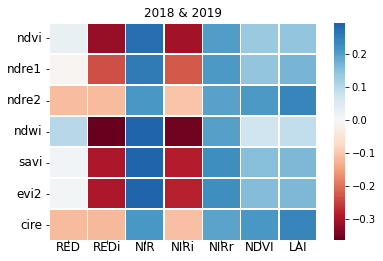

In [5]:

path_to_load = "../datasets/preprocessed_for_api/correlation_sensorvssatellite/"
df_sat = pd.read_csv(path_to_load + "df_sat.csv")
df_sensor = pd.read_csv(path_to_load + "df_sensor.csv")

# properties
lst_sat_properties = ['ndvi', 'ndre1', 'ndre2', 'ndwi', 'savi', 'evi2', 'cire']
lst_sensor_properties = ['RED', 'REDi', 'NIR', 'NIRi', 'NIRr', 'NDVI', 'LAI']

# plot using both years for the correlation analysis
correlation_matrix = fn_correlation_matrix(df_sat, df_sensor, lst_sat_properties, lst_sensor_properties)
plot_heat_map(correlation_matrix, lst_sensor_properties, lst_sat_properties, "2018 & 2019", (1,1),1)

### 3. Correlation Analysis: Lab vs Satellite

Correlates lab data with earth observation data from satellite imagery. At the third scenario of our analysis, we have considered again the data lab with Yield and Quality properties (e.g. Sugar content (Brix%), # of Grape Crates per cells, Titratable acidity (%), Mass of Harvest Product (kg)), and the satellite imagery properties.

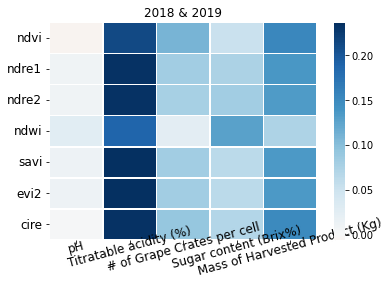

In [6]:
path_to_load = "../datasets/preprocessed_for_api/correlation_labvssatellite/"

df_lab = pd.read_csv(path_to_load + "df_lab.csv")
df_sat = pd.read_csv(path_to_load + "df_sat.csv")

# properties
lst_sat_properties = ['ndvi', 'ndre1', 'ndre2', 'ndwi', 'savi', 'evi2', 'cire']
lst_lab_properties = ['pH', 'Titratable acidity (%)', '# of Grape Crates per cell', 'Sugar content (Brix%)', 'Mass of Harvested Product (Kg)']

# plot using both years for the correlation analysis
correlation_matrix = fn_correlation_matrix(df_sat, df_lab, lst_sat_properties, lst_lab_properties)

# plot using both years for the correlation analysis
plot_heat_map(correlation_matrix, lst_lab_properties, lst_sat_properties, "2018 & 2019", (1,1),1, rotation=15)

